# Forecasting Returns and Data Analysis Using Geometric Brownian Motion

### Background:
#### • Writing / reading data: CSVs and Excel
#### • Time series data generation and manipulation
#### • Analysis of parametric and non-parametric probability distributions
#### • Basics of the portfolio theory and risk / return metrics
#### • Data visualization

## Step 1 - Inputs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Loading in excel csv parameters table using pandas 

parameters_df = pd.read_csv('m&g_case_study.csv')
parameters_df

C:\Users\ishow\AppData\Local\Temp\ipykernel_20068\2661590527.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


,Portfolio,Expected Annualized Returns (Mean),Expected Annualized Volatility (Vol),Correlation
0,Equities,0.08,0.25,NaN
1,Bonds,0.05,0.10,NaN
2,NaN,NaN,NaN,NaN
3,Equities/Bonds correlation,NaN,NaN,0.3


In [2]:
# (Optional) Advanced step
# Creating an excel file directly from python using using xlsxwriter library
# First lets create a dataframe using pandas before saving it as an excel file using xlsx

data = {
    'Portfolio': ['Equities', 'Bonds', '', 'Equities/Bonds correlation'],
    'Expected Annualized Returns (Mean)': [0.08, 0.05, None, None],
    'Expected Annualized Volatility (Vol)': [0.25, 0.1, None, None],
    'Correlation': [None, None, None, 0.3]
}

advanced_parameters_df = pd.DataFrame(data)
advanced_parameters_df

,Portfolio,Expected Annualized Returns (Mean),Expected Annualized Volatility (Vol),Correlation
0,Equities,0.08,0.25,NaN
1,Bonds,0.05,0.10,NaN
2,,NaN,NaN,NaN
3,Equities/Bonds correlation,NaN,NaN,0.3


In [3]:
import xlsxwriter

# Now use xlsx writer to save the df in a worksheet

writer  = pd.ExcelWriter('Parameters.xlsx', engine = 'xlsxwriter')
advanced_parameters_df.to_excel(writer, 'Inputs', index = False)
workbook = writer.book
worksheet = writer.sheets['Inputs']

In [4]:
# Define formats
background_colour = '#0a0a24'
font_colour = '#ffffff'

header_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'fg_color': '#D7E4BC',
    'border': 2
})

string_format = workbook.add_format({
    'font_color': font_colour,
    'bg_color': background_colour,
    'border': 1
})

float_format = workbook.add_format({
    'num_format': '0.00',
    'font_color': font_colour,
    'bg_color': background_colour,
    'border': 1
})

In [5]:
column_formats = {
    'A': ['Portfolio', string_format],
    'B': ['Expected Annualized Returns (Mean)', float_format],
    'C': ['Expected Annualized Volatility (Vol)', float_format],
    'D': ['Correlation', float_format]
}

for column in column_formats.keys():
    worksheet.set_column(f'{column}:{column}', 18, column_formats[column][1])
    worksheet.write(f'{column}1', column_formats[column][0], column_formats[column][1])
    
for col_num, value in enumerate(advanced_parameters_df.columns.values):
    worksheet.write(0, col_num, value, header_format)

# Save the workbook
workbook.close()

# Close the Pandas Excel writer
writer.close()

C:\Users\ishow\anaconda3\Lib\site-packages\xlsxwriter\workbook.py:369: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [6]:
# Load saved xlsx file back into python

loaded_advanced_parameters_df = pd.read_excel('Parameters.xlsx')
loaded_advanced_parameters_df

,Portfolio,Expected Annualized Returns (Mean),Expected Annualized Volatility (Vol),Correlation
0,Equities,0.08,0.25,NaN
1,Bonds,0.05,0.10,NaN
2,NaN,NaN,NaN,NaN
3,Equities/Bonds correlation,NaN,NaN,0.3


## Step 2 - Time series generation and manipulation

In [7]:
# Save the mean and std for both equities and bonds

equities_mean, equities_std = parameters_df.iloc[0, 1], parameters_df.iloc[0, 2] 
bonds_mean, bonds_std = parameters_df.iloc[1, 1], parameters_df.iloc[1, 2]

type(bonds_mean)

numpy.float64

In [8]:
# As returns and std are annualized, we need to first convert them to monthly figures in order to simulate monthly returns
# Assuming compounded returns...

monthly_equities_mean, monthly_equities_std = ((1+equities_mean)**(1/12)) - 1, (equities_std/np.sqrt(12))
monthly_bonds_mean, monthly_bonds_std = ((1+bonds_mean)**(1/12)) - 1, (bonds_std/np.sqrt(12))
monthly_equities_mean

0.00643403011000343

In [9]:
# Assuming returns follow a Gaussian distirbution

simulated_equities_returns = np.random.normal(monthly_equities_mean, monthly_equities_std, (12*5)) # Monthly returns for the next 5 years....
simulated_bonds_returns = np.random.normal(monthly_bonds_mean, monthly_bonds_std, (12*5))

In [10]:
# One scenario of monthly equities and bonds returns for the next 5 years...

print(simulated_equities_returns)
print(simulated_bonds_returns)

[ 0.13882353  0.02501087 -0.04923592  0.07895151 -0.01514844  0.08997437
 -0.0377675   0.03310002 -0.08002629  0.0060169   0.0713283   0.01725501
 -0.0524942   0.07841154  0.05595853 -0.04092035  0.04631432  0.08224114
 -0.01370684 -0.05477138  0.03270076  0.1947873  -0.09100715 -0.10581214
 -0.10194633  0.14618486 -0.04925607 -0.04125549 -0.00239911  0.03616533
  0.02386018  0.02093751 -0.07229396 -0.05978789 -0.04970207  0.10025961
 -0.03280882 -0.00339115  0.0748207   0.00049372 -0.01372853 -0.10983518
 -0.04117292  0.11047953  0.03879392 -0.00214616  0.03299712  0.05377551
 -0.06396869  0.00235309 -0.02024106 -0.0345269  -0.09394384 -0.01681534
 -0.02269086 -0.03997269  0.0260159  -0.09132798 -0.01064701  0.01649072]
[-0.0423421  -0.02889192 -0.0264855   0.02770721  0.0022232   0.02500077
  0.01743717 -0.00156306 -0.01268711  0.04898904 -0.03922126  0.00562608
  0.00530733  0.02268194  0.02619718  0.01636521 -0.01272655 -0.01328933
  0.00042974 -0.03473544  0.02778616 -0.0227227   

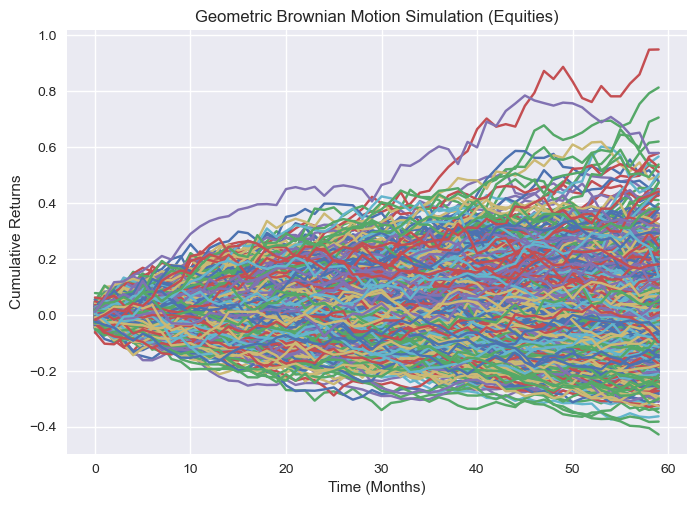

In [11]:
# Using monte carlo simulation to create a 1000 scenarios of monthly returns for the next 5 years
# Using Geometric Brownian Motion (GBM), which is useful for producing returns/price forecast in finance, as it incoporates a trend (drift) and stochastic (randomness) component

# Assumptions of GBM: constant mean & variance (drawbacks), and S0 (intial stock price) > 0
# Defined by the following equation Stochastic Differential Equation (SDE):
#   dS(t) = mu * S(t) * dt + sigma * S(t) * dB(t), which simplifies to,
#   S(t) = S(0) * e^((u - (σ^2)/2) * t + σ * B(t))
# Assumes logarithmic returns of the asset follow a normal distrubution and asset's price evolves over time.

# First for equities...

# Parameter definitions for GBM
mu = monthly_equities_mean     # Drift coefficient 
n = 60                         # Number of intervals
T = 5                          # Time in years
S0 = 100                       # Initial stock price (or in this case study could be intial investment amount)
M = 1000                       # Number of simulations 
sigma = monthly_equities_std   # Volatility
dt = T/n                       # Time step (size of each interval in years)


# Simulation using numpy
np.random.seed(42) # Set a seed number to ensure everytime the code is run the same random sequence is generated
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size = (M, n)).T
)

# Multiply through by S0 and return the cumulative product of elements along a given simualtion path (axis = 0).
St = St.cumprod(axis = 0) - 1

equities_returns_simulations = []      # Create an empty list to store each scenario

plt.xlabel('Time (Months)')
plt.ylabel('Cumulative Returns')
plt.title('Geometric Brownian Motion Simulation (Equities)')

for i in range(M):
    scenario_index_counter = i + 1
    scenario = [scenario_index_counter for i in range(60)]
    time_step = [i + 1 for i in range (60)]
    df = pd.DataFrame({'Scenario': scenario, 'Time Step': time_step, 'Equities Returns': St[:,i]})
    equities_returns_simulations.append(df)
    plt.plot(df['Equities Returns'])

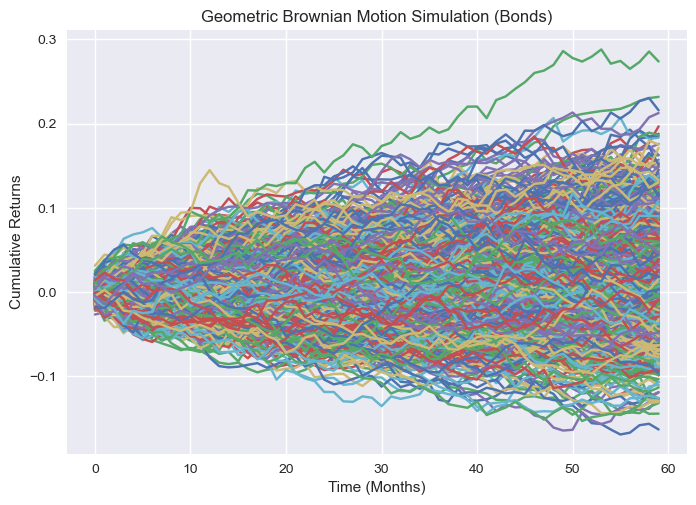

In [12]:
# Now for bonds...

mu = monthly_bonds_mean     # Drift coefficient 
n = 60                      # Number of intervals
T = 5                       # Time in years
S0 = 100                    # Initial stock price (or in this case study could be intial investment amount)
M = 1000                    # Number of simulations 
sigma = monthly_bonds_std   # Volatility
dt = T/n                    # Time step (size of each interval in years)


# Simulation using numpy
np.random.seed(84) # Set a seed number to ensure everytime the code is run the same random sequence is generated
St = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size = (M, n)).T
)

# Multiply through by S0 and return the cumulative product of elements along a given simualtion path (axis = 0).
St = St.cumprod(axis = 0) - 1

bonds_returns_simulations = []      # Create an empty list to store each scenario

plt.xlabel('Time (Months)')
plt.ylabel('Cumulative Returns')
plt.title('Geometric Brownian Motion Simulation (Bonds)')

for i in range(M):
    df = pd.DataFrame({'Bonds Returns': St[:,i]})
    bonds_returns_simulations.append(df)
    plt.plot(df['Bonds Returns'])

In [13]:
# List of simulations
all_simulations = [equities_returns_simulations, bonds_returns_simulations]

# Concat each asset simulations into a df where each asset's simulations are listed consecutively
combined_simulations = [pd.concat(sim, axis=0) for sim in all_simulations]

# Combine all assets' dfs into one
gbm_simulation_df = pd.concat(combined_simulations, axis=1).reset_index(drop=True)

# Transform returns time series into cumulative return indices (assume £100 investment at Time 0) for Equities and Bonds
gbm_simulation_df[['Equities Returns', 'Bonds Returns']] = (gbm_simulation_df[['Equities Returns', 'Bonds Returns']] + 1) * 100

gbm_simulation_df

,Scenario,Time Step,Equities Returns,Bonds Returns
0,1,1,101.072447,99.920833
1,1,2,100.813896,99.568509
2,1,3,102.216066,100.150635
3,1,4,105.545043,99.077244
4,1,5,105.064954,98.660292
...,...,...,...,...
59995,1000,56,168.413716,107.999515
59996,1000,57,164.653941,106.826742
59997,1000,58,165.191071,106.319159
59998,1000,59,157.900360,105.590476


In [14]:
# Save the df into an Excel file use xlsx writer 
# Saving into a new with two worksheets, Data & Inputs, containing the original paramters table and the simulation df, respectively

with pd.ExcelWriter('case_study_data.xlsx', engine = 'xlsxwriter') as writer:
    advanced_parameters_df.to_excel(writer, 'Inputs', index = False)
    gbm_simulation_df.to_excel(writer, 'Data', index = False)

workbook = writer.book
worksheet = writer.sheets['Data']

workbook.close()
writer.close()

C:\Users\ishow\anaconda3\Lib\site-packages\xlsxwriter\workbook.py:369: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [15]:
# Advanced (optional)
# Calculating correlation (rho) between both equities and bonds prices with their volatility, which will be used as inputs in Heston Model
# Use numpy.random to select a random scenario to use for the calculations

np.random.seed(24)
corr_df_equities = equities_returns_simulations[np.random.randint(0, 1000)]   # Use numpy to randomly select a scenario to use for rho calculation
corr_df_bonds = bonds_returns_simulations[np.random.randint(0, 1000)]         # Use numpy to randomly select a scenario to use for rho calculation

rolling_window = 3  # Rolling period for calculating the moving std 

corr_df_equities['Rolling Volatility'] = corr_df_equities['Equities Returns'].rolling(window=rolling_window).std()
corr_df_bonds['Rolling Volatility'] = corr_df_bonds['Bonds Returns'].rolling(window=rolling_window).std()

corr_df_equities.dropna(inplace=True)
corr_df_bonds.dropna(inplace=True)

equities_price_vol_corr = corr_df_equities['Equities Returns'].corr(corr_df_equities['Rolling Volatility'])
bonds_price_vol_corr = corr_df_bonds['Bonds Returns'].corr(corr_df_bonds['Rolling Volatility'])

print(equities_price_vol_corr, bonds_price_vol_corr)

0.14382255813467745 -0.0054593170536701395


C:\Users\ishow\AppData\Local\Temp\ipykernel_20068\3974028474.py:38: RuntimeWarning: invalid value encountered in sqrt
  V[t] = V[t-1] + kappa * (theta - V[t-1]) * dt + sigma * np.sqrt(V[t-1]) *dZ1
C:\Users\ishow\AppData\Local\Temp\ipykernel_20068\3974028474.py:46: RuntimeWarning: invalid value encountered in sqrt
  S[t] = S[t-1] * np.exp((r - 0.5 * V[t]) * dt + np.sqrt(V[t]) * dW)


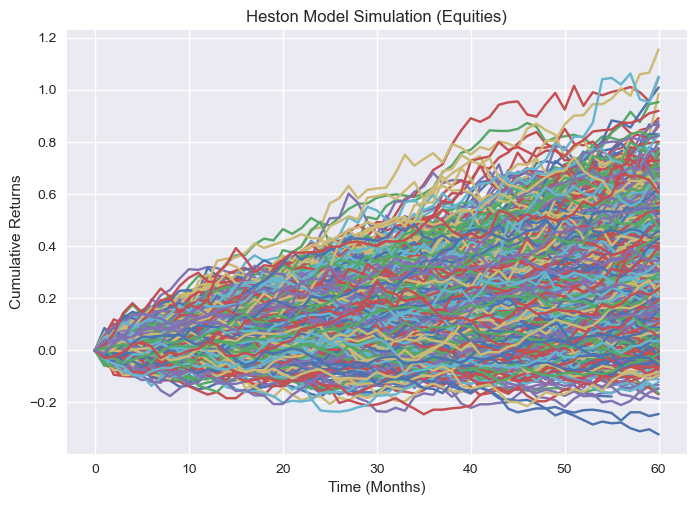

In [16]:
# A better model for generating asset returns/prices forecasts is using the Heston Model which doesn't assume constant volatility
# as volatility is mean reverting

# First for equities

# calculate parameters for Heston model
kappa = 2 # Mean reversion speed of variance
theta = monthly_equities_std ** 2 # Long-term average variance
sigma = monthly_equities_std # Volatility of volatility 
rho = equities_price_vol_corr # Correlation between stock price and its volatility 

# Heston model parameters
S0 = 100 # Intial stock price
r = 0.0525 # Risk-free interest rate
T = 5 # Time-to-maturity in years
N = 60 # Number of time steps
dt = T / N # Time increment
num_simulations = 1000

np.random.seed(0)

equities_returns_simulations_heston = []

plt.xlabel('Time (Months)')
plt.ylabel('Cumulative Returns')
plt.title('Heston Model Simulation (Equities)')

for i in range(num_simulations):
    V = np.zeros(N+1)
    V[0] = theta
    
    for t in range (1, N+1):
        # dz1 used to modelthe randomness or noise in the volatility process.
        dZ1 = np.random.normal(0, np.sqrt(dt))
        # generated to introduce correlation betweenn the stock price and its volatility.
        dZ2 = rho * dZ1 + np.sqrt(1 - rho ** 2) * np.random.normal (0, np.sqrt(dt))
        # generated to introduce correlation between the stock price and its volatility mean reversion
        V[t] = V[t-1] + kappa * (theta - V[t-1]) * dt + sigma * np.sqrt(V[t-1]) *dZ1 
        
        
    S = np.zeros(N+1)
    S[0] = S0
    
    for t in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt))
        S[t] = S[t-1] * np.exp((r - 0.5 * V[t]) * dt + np.sqrt(V[t]) * dW)
    
    S = S/100 - 1 
    
    df_heston = pd.DataFrame(S, columns = ["Equities Returns"])
    equities_returns_simulations_heston.append(df_heston)
    plt.plot(df_heston['Equities Returns'])

C:\Users\ishow\AppData\Local\Temp\ipykernel_20068\3876882640.py:35: RuntimeWarning: invalid value encountered in sqrt
  V[t] = V[t-1] + kappa * (theta - V[t-1]) * dt + sigma * np.sqrt(V[t-1]) *dZ1
C:\Users\ishow\AppData\Local\Temp\ipykernel_20068\3876882640.py:43: RuntimeWarning: invalid value encountered in sqrt
  S[t] = S[t-1] * np.exp((r - 0.5 * V[t]) * dt + np.sqrt(V[t]) * dW)


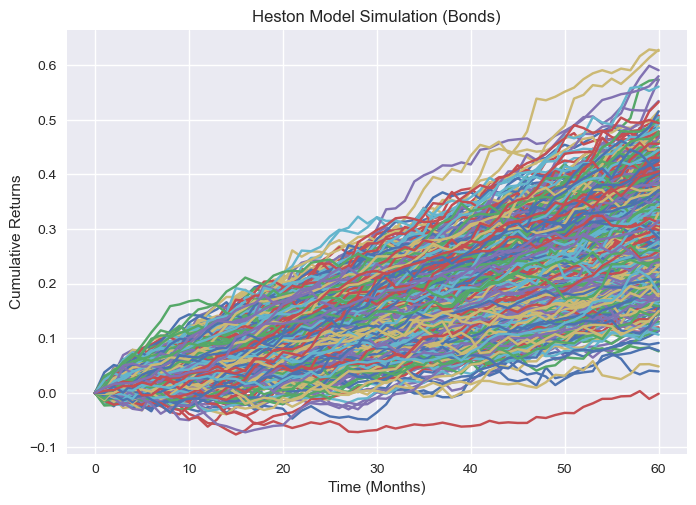

In [17]:
# Now for bonds

# calculate parameters for Heston model
kappa = 2 # Mean reversion speed of variance
theta = monthly_bonds_std ** 2 # Long-term average variance
sigma = monthly_bonds_std # Volatility of volatility 
rho = bonds_price_vol_corr # Correlation between stock price and its volatility 

# Heston model parameters
S0 = 100 # Intial stock price
r = 0.0525 # Risk-free interest rate
T = 5 # Time-to-maturity in years
N = 60 # Number of time steps
dt = T / N # Time increment
num_simulations = 1000

np.random.seed(1)

bonds_returns_simulations_heston = []

plt.xlabel('Time (Months)')
plt.ylabel('Cumulative Returns')
plt.title('Heston Model Simulation (Bonds)')

for i in range(num_simulations):
    V = np.zeros(N+1)
    V[0] = theta
    
    for t in range (1, N+1):
        # dz1 used to modelthe randomness or noise in the volatility process.
        dZ1 = np.random.normal(0, np.sqrt(dt))
        # generated to introduce correlation betweenn the stock price and its volatility.
        dZ2 = rho * dZ1 + np.sqrt(1 - rho ** 2) * np.random.normal (0, np.sqrt(dt))
        # generated to introduce correlation between the stock price and its volatility mean reversion
        V[t] = V[t-1] + kappa * (theta - V[t-1]) * dt + sigma * np.sqrt(V[t-1]) *dZ1 
        
        
    S = np.zeros(N+1)
    S[0] = S0
    
    for t in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt))
        S[t] = S[t-1] * np.exp((r - 0.5 * V[t]) * dt + np.sqrt(V[t]) * dW)
    
    S = S/100 - 1 
        
    df_heston = pd.DataFrame(S, columns = ["Bonds Returns"])
    bonds_returns_simulations_heston.append(df_heston)
    plt.plot(df_heston['Bonds Returns'])

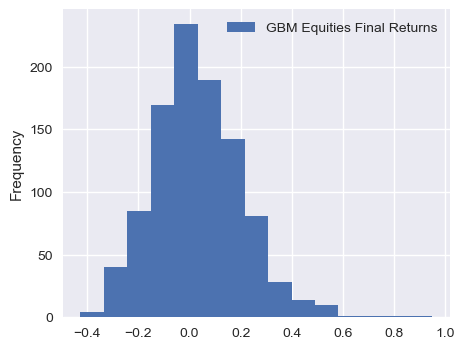

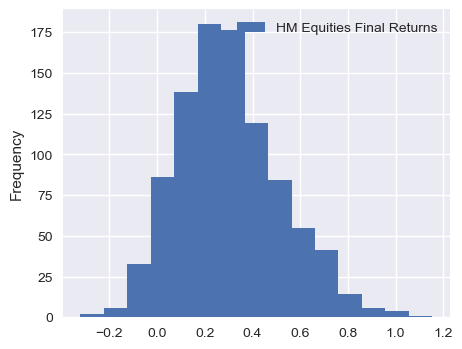

In [18]:
# Extract the final cumulative return for each scenario (1000) for both Geometric Brownian Motion and Heston Model
# Then plot for comparison

cum_return_equities_gbm = []

for df in equities_returns_simulations:
    final_cum_return = df.iloc[-1, -1]
    cum_return_equities_gbm.append(final_cum_return)
    
cum_return_equities_gbm_df = pd.DataFrame(cum_return_equities_gbm, columns = ['GBM Equities Final Returns'])

cum_return_equities_hm = []

for df in equities_returns_simulations_heston:
    final_cum_return = df.iloc[-1, -1]
    cum_return_equities_hm.append(final_cum_return)
    
cum_return_equities_hm_df = pd.DataFrame(cum_return_equities_hm, columns = ['HM Equities Final Returns'])

cum_return_equities_gbm_df.plot.hist(bins=15, figsize=(5, 4))
cum_return_equities_hm_df.plot.hist(bins=15, figsize=(5, 4))
plt.show()

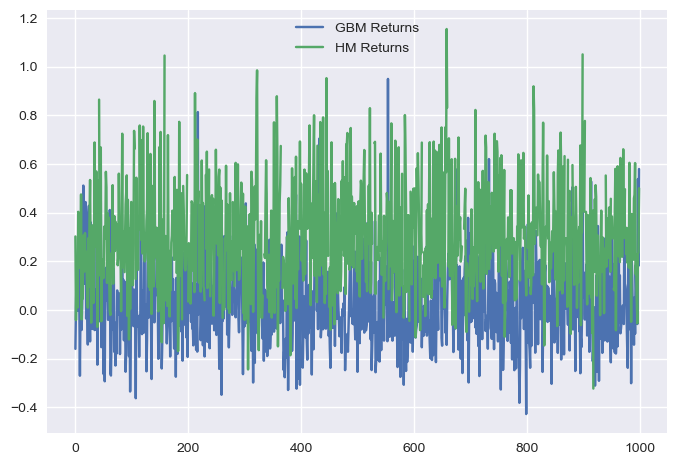

The Geometric Brownian Motion model simulations had a mean return of: [0.033184]      and standard deviation of: [0.17314207] 
While the Heston Model simulations had a mean return of: [0.30432883]      and standard deviation of: [0.21711336]


In [19]:
plt.plot(cum_return_equities_gbm_df, label='GBM Returns')
plt.plot(cum_return_equities_hm_df, label='HM Returns')
plt.legend(loc='best')
plt.show()

gbm_std = cum_return_equities_gbm_df.std().values
gbm_mean = cum_return_equities_gbm_df.mean().values
hm_std = cum_return_equities_hm_df.std().values
hm_mean = cum_return_equities_hm_df.mean().values

print(f'The Geometric Brownian Motion model simulations had a mean return of: {gbm_mean}\
      and standard deviation of: {gbm_std} \nWhile the Heston Model simulations had a mean return of: {hm_mean}\
      and standard deviation of: {hm_std}')

## Step 3 - Analysis of Distributions

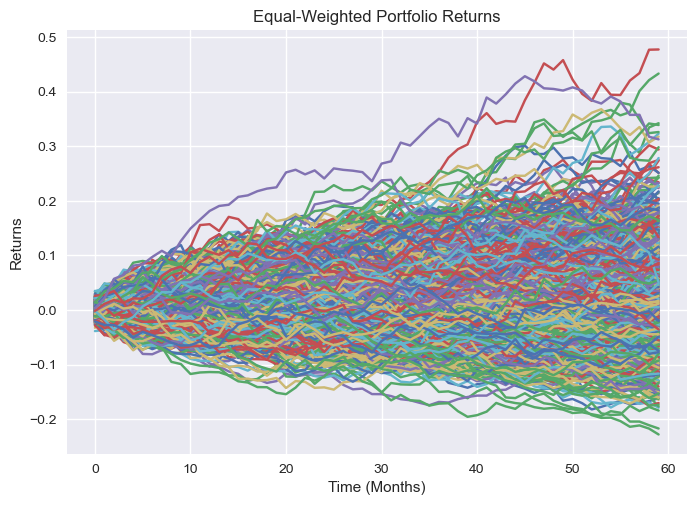

In [20]:
# Creating an equal-weighted equities and bonds portfolio 

plt.xlabel('Time (Months)')
plt.ylabel('Returns')
plt.title('Equal-Weighted Portfolio Returns')

equal_weight = []
for i, df in enumerate(equities_returns_simulations):
    equal_port_df = pd.concat([df.iloc[:, -1], bonds_returns_simulations[i].iloc[:, - 1]], axis=1)
    equal_port_df = equal_port_df.iloc[:, 0] * 0.5 + equal_port_df.iloc[:, 1] * 0.5 
    equal_weight.append(pd.DataFrame(equal_port_df, columns=['Equal-Weighted Returns']))
    plt.plot(equal_port_df)

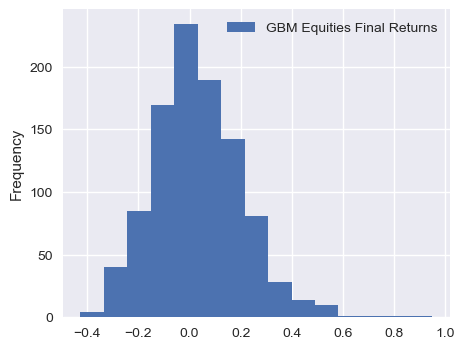

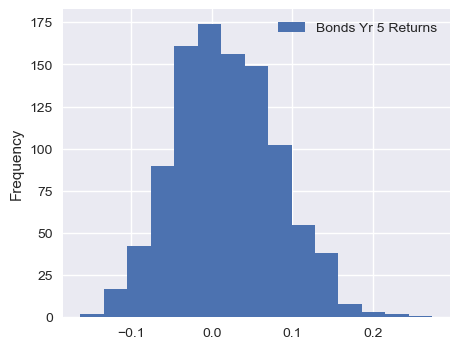

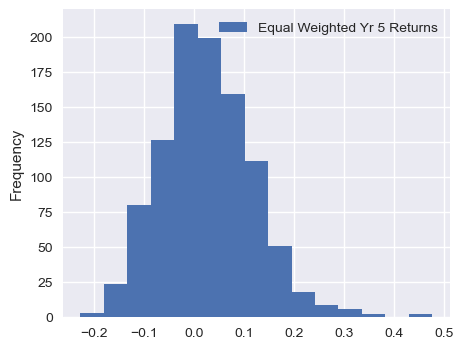

In [21]:
# Extract year 5 values for all 1000 simulations three types of the portfolio types

equities_port_final_values = cum_return_equities_gbm_df.copy()  # Equities Yr 5 returns

cum_return_bonds = []
for df in bonds_returns_simulations:
    final_cum_return = df.iloc[-1, -1]
    cum_return_bonds.append(final_cum_return)
    
bonds_port_final_values = pd.DataFrame(cum_return_bonds, columns=['Bonds Yr 5 Returns'])  # Bonds Yr 5 Returns

cum_return_equal_weight = []
for df in equal_weight:
    final_cum_return = df.iloc[-1, -1]
    cum_return_equal_weight.append(final_cum_return)
    
equal_port_final_values = pd.DataFrame(cum_return_equal_weight, columns=['Equal Weighted Yr 5 Returns'])  # Equal-weighted Yr 5 Returns

equal_port_final_values.dropna(inplace=True)
equities_port_final_values.dropna(inplace=True)
bonds_port_final_values.dropna(inplace=True)

equities_port_final_values.plot.hist(bins=15, figsize=(5, 4))
bonds_port_final_values.plot.hist(bins=15, figsize=(5, 4))
equal_port_final_values.plot.hist(bins=15, figsize=(5, 4))
plt.show()

In [22]:
import scipy.stats as stats

# Create a dictionary for the three types of portfolios each containing the yr 5 cumulative returns for all 1000 scenarios
portfolios = {'equities': equities_port_final_values, 'bonds': bonds_port_final_values, 'equal_weighted': equal_port_final_values}

statistics = {}

for port_name, port_df in portfolios.items():         # Calculate moments for each portfolio type
    port_statistics = {
                'Mean': port_df.mean().values,
                'Variance': port_df.var().values,
                'Skewness': port_df.apply(stats.skew).values,
                'Kurtosis': port_df.apply(stats.kurtosis).values
            }
    
    statistics[port_name] = port_statistics

for port_name, port_stats in statistics.items():
    print(f'The moments for {port_name} are: \n')
    for moment, value in port_stats.items():
        print(f'{moment}: {np.around(value, decimals=4)}')
    print('\n')

The moments for equities are: 

Mean: [0.0332]
Variance: [0.03]
Skewness: [0.6322]
Kurtosis: [1.2612]


The moments for bonds are: 

Mean: [0.0184]
Variance: [0.004]
Skewness: [0.2454]
Kurtosis: [0.0323]


The moments for equal_weighted are: 

Mean: [0.0258]
Variance: [0.0086]
Skewness: [0.5356]
Kurtosis: [0.9219]




<Axes: ylabel='Frequency'>

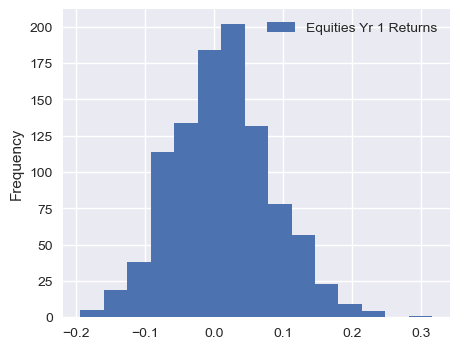

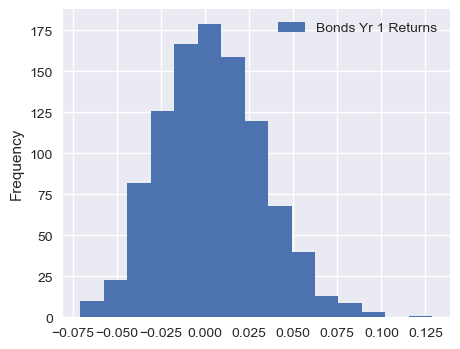

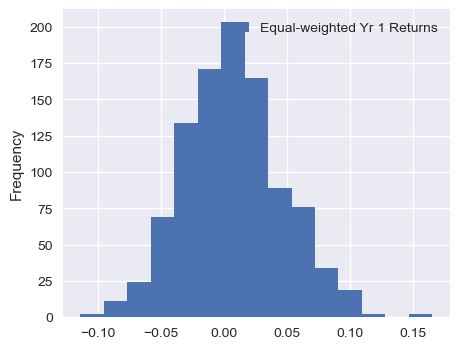

In [23]:
# Extracting year 1 returns for all 1000 scenarios of all portfolio type
# Then plotting histogram of the each portfolio year 1 returns

equities_yr1 = []

for df in equities_returns_simulations:
    df = df.iloc[12-1, -1]
    equities_yr1.append(df)
    
equities_yr1_returns = pd.DataFrame(equities_yr1, columns = ['Equities Yr 1 Returns'])
equities_yr1_returns.plot.hist(bins=15, figsize=(5, 4))

bonds_yr1 = []

for df in bonds_returns_simulations:
    df = df.iloc[12-1, -1]
    bonds_yr1.append(df)
    
bonds_yr1_returns = pd.DataFrame(bonds_yr1, columns = ['Bonds Yr 1 Returns'])
bonds_yr1_returns.plot.hist(bins=15, figsize=(5, 4))

equal_weight_yr1 = []

for df in equal_weight:
    df = df.iloc[12-1, -1]
    equal_weight_yr1.append(df)
    
equal_weight_yr1_returns = pd.DataFrame(equal_weight_yr1, columns = ['Equal-weighted Yr 1 Returns'])
equal_weight_yr1_returns.plot.hist(bins=15, figsize=(5, 4))

<Axes: ylabel='Frequency'>

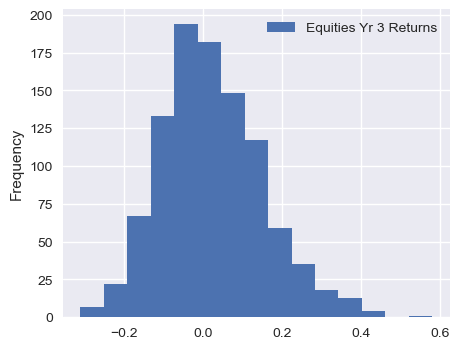

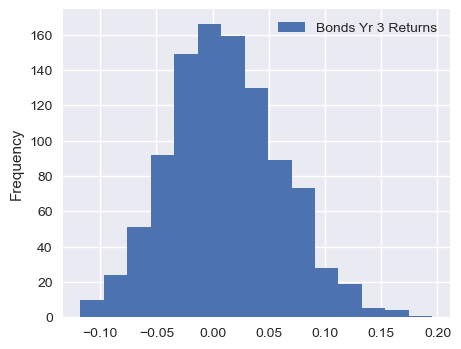

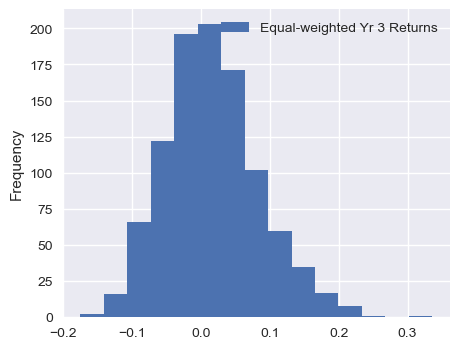

In [24]:
# Doing the same as above for year 3 - extracting all year 3 returns


equities_yr3 = []

for df in equities_returns_simulations:
    df = df.iloc[36-1, -1]
    equities_yr3.append(df)
    
equities_yr3_returns = pd.DataFrame(equities_yr3, columns = ['Equities Yr 3 Returns'])
equities_yr3_returns.plot.hist(bins=15, figsize=(5, 4))

bonds_yr3 = []

for df in bonds_returns_simulations:
    df = df.iloc[36-1, -1]
    bonds_yr3.append(df)
    
bonds_yr3_returns = pd.DataFrame(bonds_yr3, columns = ['Bonds Yr 3 Returns'])
bonds_yr3_returns.plot.hist(bins=15, figsize=(5, 4))

equal_weight_yr3 = []

for df in equal_weight:
    df = df.iloc[36-1, -1]
    equal_weight_yr3.append(df)
    
equal_weight_yr3_returns = pd.DataFrame(equal_weight_yr3, columns = ['Equal-weighted Yr 3 Returns'])
equal_weight_yr3_returns.plot.hist(bins=15, figsize=(5, 4))

In [25]:
# Advanced (optional) downloading monthly historical time series for any major Equity and Bond indices
# Then plotting the distribution of £100 initial investment made 10 years ago in Equity Index, Bond Index, 50/50 portfolio.

import yfinance as yf

equity_index = yf.download('^GSPC', period='10y')     # S&P 500 Index
bond_index = yf.download('FXNAX', period='10y')   # Fidelity U.S. Bond Index (using this instead of S&P 500 Bond Index, as I was encountering issues)

cols_to_drop = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

# Drop columns that aren't required
equity_index.drop(columns = cols_to_drop, inplace=True)
bond_index.drop(columns = cols_to_drop, inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
# Take log returns of both indicies
equity_index = np.log(equity_index.pct_change() + 1)
bond_index = np.log(bond_index.pct_change() + 1)

equity_index.dropna(inplace=True)
bond_index.dropna(inplace=True)
equity_index

,Close
Date,
2014-08-07,-0.005572
2014-08-08,0.011465
2014-08-11,0.002756
2014-08-12,-0.001638
2014-08-13,0.006685
...,...
2024-07-30,-0.004973
2024-07-31,0.015670
2024-08-01,-0.013788


In [27]:
# Compute the cumulative products of the returns, then assume a £100 investment

# Equity Index
equity_index = (equity_index + 1).cumprod()
equity_index = equity_index * 100
equity_index.columns = ['Portfolio Value']

# Bond Index
bond_index = (bond_index + 1).cumprod()
bond_index = bond_index * 100
bond_index.columns = ['Portfolio Value']

equity_index

,Portfolio Value
Date,
2014-08-07,99.442788
2014-08-08,100.582942
2014-08-11,100.860111
2014-08-12,100.694904
2014-08-13,101.368026
...,...
2024-07-30,241.365750
2024-07-31,245.147947
2024-08-01,241.767816


In [28]:
# Create an equal-weighted portfolio of both indicies

equal_weighted_indicies = pd.DataFrame(equity_index.values * 0.5) + pd.DataFrame(bond_index.values * 0.5)
equal_weighted_indicies.fillna(159.875, inplace=True)
equal_weighted_indicies.columns = ['Portfolio Value']
equal_weighted_indicies.index = equity_index.index
equal_weighted_indicies

,Portfolio Value
Date,
2014-08-07,99.850093
2014-08-08,100.377195
2014-08-11,100.515780
2014-08-12,100.347194
2014-08-13,100.812454
...,...
2024-07-30,164.641758
2024-07-31,166.744703
2024-08-01,165.224200


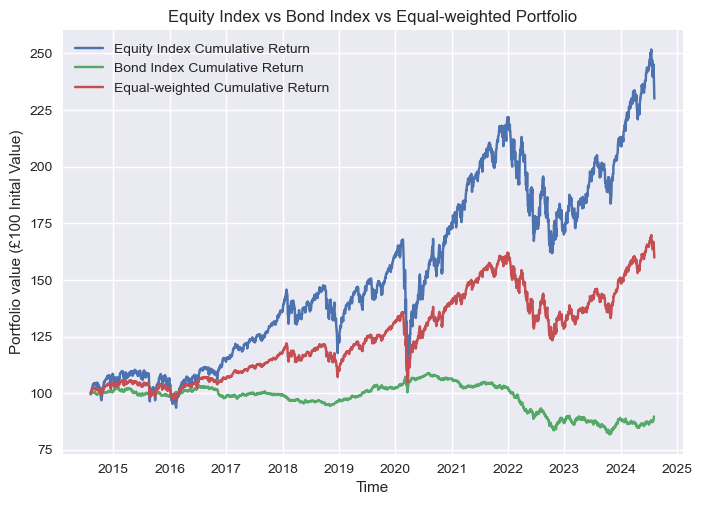

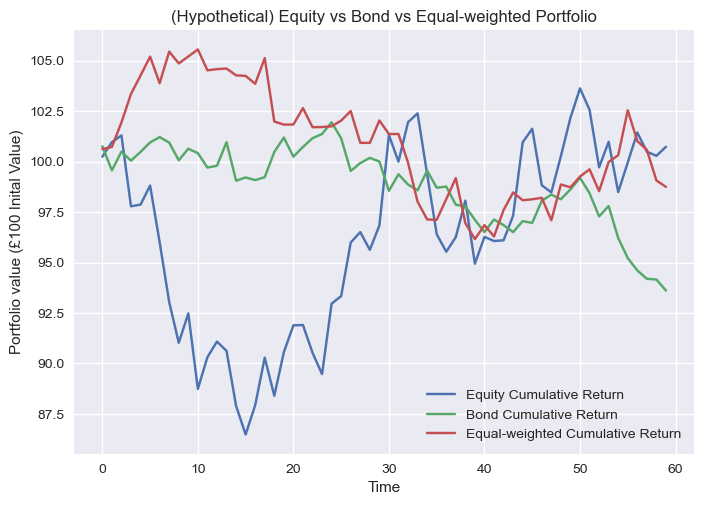

In [29]:
# Lets compare the above indicies portfolios with earlier simulation returns

# Plotting first for the indicies portfolios
plt.xlabel('Time')
plt.ylabel('Portfolio value (£100 Inital Value)')
plt.title('Equity Index vs Bond Index vs Equal-weighted Portfolio')

plt.plot(equity_index['Portfolio Value'], label='Equity Index Cumulative Return')
plt.plot(bond_index['Portfolio Value'], label='Bond Index Cumulative Return')
plt.plot(equal_weighted_indicies['Portfolio Value'], label='Equal-weighted Cumulative Return')
plt.legend(loc='best')

plt.show()

# Now plotting for the simulation portfolios
plt.xlabel('Time')
plt.ylabel('Portfolio value (£100 Inital Value)')
plt.title('(Hypothetical) Equity vs Bond vs Equal-weighted Portfolio')

np.random.seed(100)
plt.plot((equities_returns_simulations[np.random.randint(1000)].iloc[:, -1] + 1 ) * 100, label='Equity Cumulative Return')
plt.plot((bonds_returns_simulations[np.random.randint(1000)].iloc[:, -1] + 1) * 100 , label='Bond Cumulative Return')
plt.plot((equal_weight[np.random.randint(1000)].iloc[:, -1] + 1) * 100, label='Equal-weighted Cumulative Return')
plt.legend(loc='best')

## Step 4 - Risk/Return Analytics

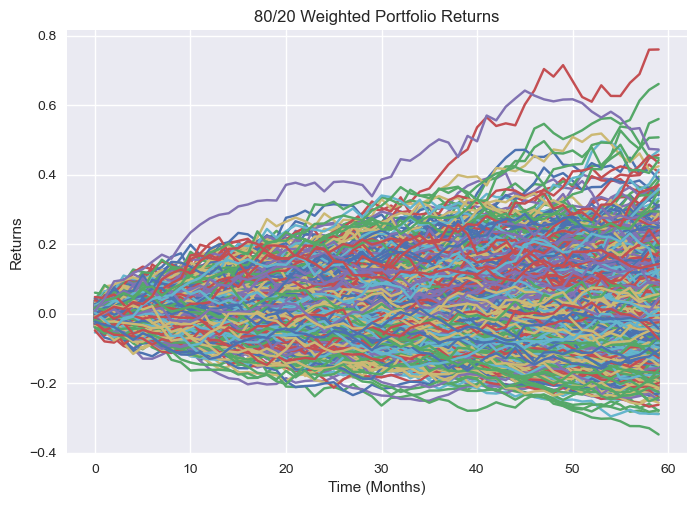

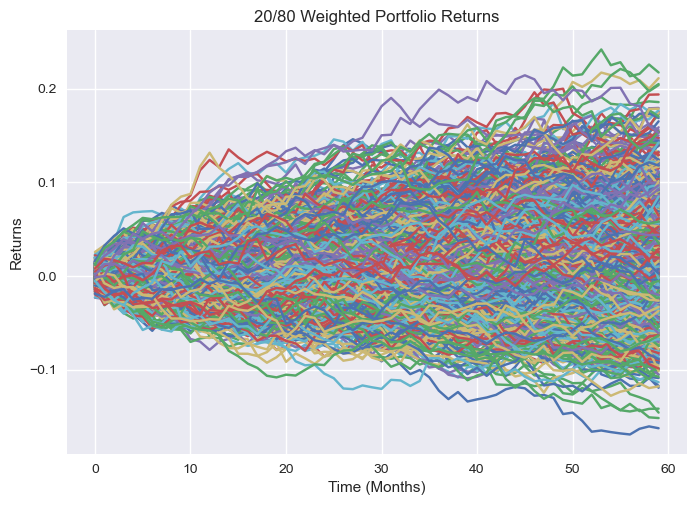

In [30]:
# Creating an 80/20 and 20/80 portfolio of equities and bonds

# 80/20
plt.xlabel('Time (Months)')
plt.ylabel('Returns')
plt.title('80/20 Weighted Portfolio Returns')

eighty_twenty_weight = []
for i, df in enumerate(equities_returns_simulations):
    eighty_twenty_port_df = pd.concat([df.iloc[:, -1], bonds_returns_simulations[i].iloc[:, - 1]], axis=1)   # Create df containing equitiy and bond returns
    eighty_twenty_port_df = eighty_twenty_port_df.iloc[:, 0] * 0.8 + eighty_twenty_port_df.iloc[:, 1] * 0.2  # Equal weight the returns and save in a df
    eighty_twenty_weight.append(pd.DataFrame(eighty_twenty_port_df, columns=['80/20 Weighted Returns']))
    plt.plot(eighty_twenty_port_df)
plt.show()

# 20/80 
plt.xlabel('Time (Months)')
plt.ylabel('Returns')
plt.title('20/80 Weighted Portfolio Returns')

# Repeat same as above for 20/80 portfolio weighting
twenty_eighty_weight = []
for i, df in enumerate(equities_returns_simulations):
    twenty_eighty_port_df = pd.concat([df.iloc[:, -1], bonds_returns_simulations[i].iloc[:, - 1]], axis=1)
    twenty_eighty_port_df = twenty_eighty_port_df.iloc[:, 0] * 0.2 + twenty_eighty_port_df.iloc[:, 1] * 0.8 
    twenty_eighty_weight.append(pd.DataFrame(twenty_eighty_port_df, columns=['20/80 Weighted Returns']))
    plt.plot(twenty_eighty_port_df)
plt.show()

In [31]:
# Filtering out all scenarios that do not have a positive cumulative return at the end of its projection

portfolios_list = [equities_returns_simulations, bonds_returns_simulations, equal_weight, eighty_twenty_weight, twenty_eighty_weight]

for i, simulations in enumerate(portfolios_list):
    # New list that will contain only dfs with positive final cumulative return
    filtered_simulations = [df for df in simulations if df.iloc[-1, -1] > 0]
    
    # Replace the original list with the filtered list
    portfolios_list[i] = filtered_simulations

# selecting 3 random scenarios (that have a positive cumulative at projection end) from all portfolios

all_portfolios = {'equities': portfolios_list[0], 'bonds': portfolios_list[1], 'equal weighted': portfolios_list[2], '80/20': portfolios_list[3], '20/80': portfolios_list[4]}
final_portfolios = {}
seed_count = 0

for port, port_scenario in all_portfolios.items():
    seed_count += 2
    np.random.seed(seed_count)
    rand_scenarios = np.random.choice(len(port_scenario), 3, replace=False)
    scenarios_list = []
    scenario_count = 0
    for num in rand_scenarios:
        scenario_count += 1
        scenarios_list.append(pd.DataFrame({f'{port} Portfolio, Scenario {scenario_count}': port_scenario[num].iloc[:, -1]}))
    final_portfolios[port] = scenarios_list
    
final_portfolios['80/20']

[    80/20 Portfolio, Scenario 1
 0                      0.025258
 1                      0.054153
 2                      0.084259
 3                      0.096281
 4                      0.104857
 5                      0.094870
 6                      0.109231
 7                      0.085357
 8                      0.063269
 9                      0.058295
 10                     0.091439
 11                     0.081841
 12                     0.075644
 13                     0.082583
 14                     0.100493
 15                     0.122827
 16                     0.102623
 17                     0.099201
 18                     0.107529
 19                     0.114310
 20                     0.132080
 21                     0.148179
 22                     0.149498
 23                     0.175471
 24                     0.195573
 25                     0.215996
 26                     0.205841
 27                     0.219168
 28                     0.248814
 29       

In [32]:
final_list = []
for port, port_df in final_portfolios.items():
    for i, df in enumerate(port_df):
        final_list.append(df)

final_df = pd.concat([df for df in final_list], axis=1)
final_df = (final_df + 1) * 100
final_df.tail(5)

,"equities Portfolio, Scenario 1","equities Portfolio, Scenario 2","equities Portfolio, Scenario 3","bonds Portfolio, Scenario 1","bonds Portfolio, Scenario 2","bonds Portfolio, Scenario 3","equal weighted Portfolio, Scenario 1","equal weighted Portfolio, Scenario 2","equal weighted Portfolio, Scenario 3","80/20 Portfolio, Scenario 1","80/20 Portfolio, Scenario 2","80/20 Portfolio, Scenario 3","20/80 Portfolio, Scenario 1","20/80 Portfolio, Scenario 2","20/80 Portfolio, Scenario 3"
55,112.205276,108.187194,101.874221,105.632806,112.084081,106.914277,105.437250,101.821560,105.281637,121.310821,107.945776,125.206291,109.559062,99.208434,114.181659
56,117.223303,111.217938,102.232199,104.643965,112.697843,107.026609,104.537917,103.648670,105.994742,116.094800,109.148468,128.016829,109.212315,100.864581,114.314389
57,114.824134,111.444865,104.225318,104.313587,112.860708,107.826544,104.386197,104.538561,104.457239,116.805615,105.928397,123.974272,109.124030,100.705219,114.652439
58,114.050636,113.502557,107.772433,103.658599,111.416710,106.625679,105.096161,102.840990,106.194915,117.288482,105.603790,125.830842,109.892676,99.980440,114.078574
59,114.638860,113.973702,107.727814,102.780083,111.518544,106.616702,104.689728,102.319651,108.926508,114.646509,106.590812,128.904461,107.995592,100.916243,113.143186


In [33]:
final_df_mean = (((final_df.iloc[-1] / 100) ** (1/5)) - 1).to_frame().T
final_df_mean.index = [' Annualized Returns']

final_df_std = pd.DataFrame(final_df.std ()/ np.sqrt(5)).T
final_df_std.index = ['Volatility']

final_df_max_drawdown = (((final_df.min() + 1)/(final_df.max() + 1)) - 1).to_frame().T
final_df_max_drawdown.index = ['Maximum Drawdown']

final_df_sr = (final_df_mean - 0.02) / final_df_std.values
final_df_sr.index = ['Sharpe Ratio']

final_df_metrics = pd.concat([final_df_mean, final_df_std, final_df_max_drawdown, final_df_sr], axis=0)
final_df_metrics

,"equities Portfolio, Scenario 1","equities Portfolio, Scenario 2","equities Portfolio, Scenario 3","bonds Portfolio, Scenario 1","bonds Portfolio, Scenario 2","bonds Portfolio, Scenario 3","equal weighted Portfolio, Scenario 1","equal weighted Portfolio, Scenario 2","equal weighted Portfolio, Scenario 3","80/20 Portfolio, Scenario 1","80/20 Portfolio, Scenario 2","80/20 Portfolio, Scenario 3","20/80 Portfolio, Scenario 1","20/80 Portfolio, Scenario 2","20/80 Portfolio, Scenario 3"
Annualized Returns,0.027700,0.026505,0.014999,0.005499,0.022044,0.012896,0.009208,0.004597,0.017248,0.027714,0.012847,0.052092,0.015503,0.001826,0.025004
Volatility,1.435415,2.164461,3.434037,1.028889,2.526238,1.308900,1.766756,1.453035,1.007462,4.193677,2.261979,4.402071,1.027726,0.397439,2.137688
Maximum Drawdown,-0.120600,-0.178855,-0.241064,-0.082091,-0.131106,-0.098189,-0.129616,-0.118217,-0.101043,-0.236850,-0.152035,-0.249538,-0.099694,-0.034305,-0.125676
Sharpe Ratio,0.005364,0.003005,-0.001456,-0.014094,0.000809,-0.005427,-0.006108,-0.010601,-0.002732,0.001839,-0.003162,0.007290,-0.004376,-0.045728,0.002341


In [34]:
final_df_corr_matrix = final_df.corr()
final_df_corr_matrix

,"equities Portfolio, Scenario 1","equities Portfolio, Scenario 2","equities Portfolio, Scenario 3","bonds Portfolio, Scenario 1","bonds Portfolio, Scenario 2","bonds Portfolio, Scenario 3","equal weighted Portfolio, Scenario 1","equal weighted Portfolio, Scenario 2","equal weighted Portfolio, Scenario 3","80/20 Portfolio, Scenario 1","80/20 Portfolio, Scenario 2","80/20 Portfolio, Scenario 3","20/80 Portfolio, Scenario 1","20/80 Portfolio, Scenario 2","20/80 Portfolio, Scenario 3"
"equities Portfolio, Scenario 1",1.000000,0.051221,-0.286144,-0.000774,0.369369,0.292899,0.281321,0.215112,-0.082055,0.253401,0.472068,0.366777,0.324630,0.067227,0.338691
"equities Portfolio, Scenario 2",0.051221,1.000000,-0.290415,0.294453,0.503716,0.548443,0.395054,0.479156,-0.173658,0.582946,0.261145,0.523982,0.333418,0.569284,0.678177
"equities Portfolio, Scenario 3",-0.286144,-0.290415,1.000000,-0.451155,-0.781839,-0.476853,-0.484750,-0.770682,0.319145,-0.738898,-0.617472,-0.536261,-0.151024,-0.385424,-0.633733
"bonds Portfolio, Scenario 1",-0.000774,0.294453,-0.451155,1.000000,0.663806,0.650853,0.452764,0.383205,0.418157,0.500504,0.163885,0.715672,0.683540,0.035809,0.663151
"bonds Portfolio, Scenario 2",0.369369,0.503716,-0.781839,0.663806,1.000000,0.713346,0.530510,0.802530,-0.009850,0.874682,0.711568,0.815716,0.635354,0.357974,0.893693
"bonds Portfolio, Scenario 3",0.292899,0.548443,-0.476853,0.650853,0.713346,1.000000,0.822146,0.481019,0.105484,0.519185,0.318149,0.943497,0.624171,0.165853,0.886075
"equal weighted Portfolio, Scenario 1",0.281321,0.395054,-0.484750,0.452764,0.530510,0.822146,1.000000,0.339293,0.033342,0.301299,0.114744,0.795521,0.307239,0.164882,0.748358
"equal weighted Portfolio, Scenario 2",0.215112,0.479156,-0.770682,0.383205,0.802530,0.481019,0.339293,1.000000,-0.360152,0.784141,0.681395,0.520282,0.245300,0.661602,0.661563
"equal weighted Portfolio, Scenario 3",-0.082055,-0.173658,0.319145,0.418157,-0.009850,0.105484,0.033342,-0.360152,1.000000,-0.173158,-0.275574,0.165672,0.527516,-0.430615,0.027372
"80/20 Portfolio, Scenario 1",0.253401,0.582946,-0.738898,0.500504,0.874682,0.519185,0.301299,0.784141,-0.173158,1.000000,0.703041,0.594803,0.526259,0.403451,0.752171


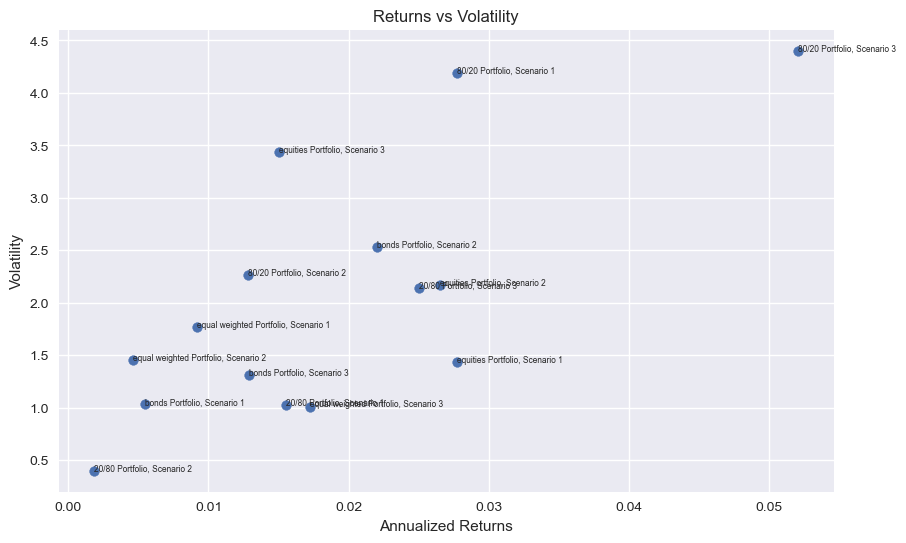

In [35]:
x = final_df_metrics.iloc[0]
y = final_df_metrics.iloc[1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

# Annotate each point with the column name
for i, column in enumerate(final_df_metrics.columns):
    plt.annotate(column, (x[i], y[i]), fontsize=6)

plt.xlabel('Annualized Returns')
plt.ylabel('Volatility')
plt.title('Returns vs Volatility')
plt.grid(True)
plt.show()

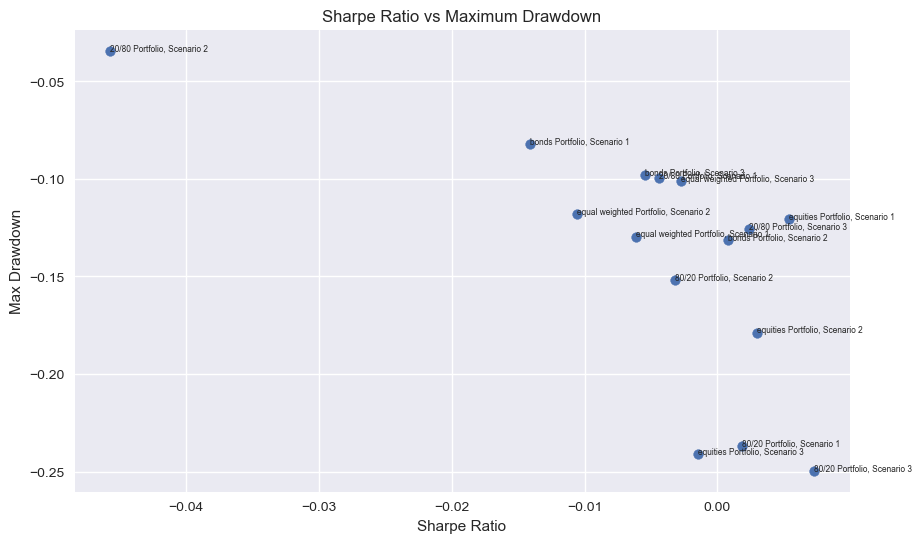

In [36]:
x = final_df_metrics.iloc[-1]
y = final_df_metrics.iloc[-2]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

# Annotate each point with the column name
for i, column in enumerate(final_df_metrics.columns):
    plt.annotate(column, (x[i], y[i]), fontsize=6)

plt.xlabel('Sharpe Ratio')
plt.ylabel('Max Drawdown')
plt.title('Sharpe Ratio vs Maximum Drawdown')
plt.grid(True)
plt.show()

In [37]:
# Save the df into an Excel file use xlsx writer 
# Saving into a new with two worksheets, Data & Inputs, containing the original paramters table and the simulation df, respectively

with pd.ExcelWriter('case_study_data.xlsx', engine = 'xlsxwriter') as writer:
    advanced_parameters_df.to_excel(writer, 'Inputs', index = False)
    gbm_simulation_df.to_excel(writer, 'Data', index = False)
    final_df_metrics.to_excel(writer, 'Output', index=False)

workbook = writer.book
worksheet = writer.sheets['Output']

workbook.close()
writer.close()

C:\Users\ishow\anaconda3\Lib\site-packages\xlsxwriter\workbook.py:369: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [38]:
# Advanced (optional) - constructing an efficient frontier for 15 portfolios (instruments) as our investment universe

final_list = []
for port, port_df in final_portfolios.items():
    for i, df in enumerate(port_df):
        final_list.append(df)

eff_frontier_df = pd.concat([df for df in final_list], axis=1)
eff_frontier_df.head()

,"equities Portfolio, Scenario 1","equities Portfolio, Scenario 2","equities Portfolio, Scenario 3","bonds Portfolio, Scenario 1","bonds Portfolio, Scenario 2","bonds Portfolio, Scenario 3","equal weighted Portfolio, Scenario 1","equal weighted Portfolio, Scenario 2","equal weighted Portfolio, Scenario 3","80/20 Portfolio, Scenario 1","80/20 Portfolio, Scenario 2","80/20 Portfolio, Scenario 3","20/80 Portfolio, Scenario 1","20/80 Portfolio, Scenario 2","20/80 Portfolio, Scenario 3"
0,0.040715,0.006432,0.029402,0.005069,0.007119,-0.006639,-0.007058,-0.000572,-0.002867,0.025258,-0.008731,0.004476,-0.004037,0.003238,0.020100
1,0.063474,0.000033,0.030842,-0.005983,0.003317,0.007403,-0.006259,-0.003322,0.005726,0.054153,0.013533,0.012607,0.004196,-0.004179,0.020387
2,0.100870,0.046163,0.036505,-0.013041,-0.008819,0.006170,0.003749,-0.006257,0.011289,0.084259,-0.002791,0.024679,0.022182,-0.003463,0.011288
3,0.110231,0.014104,0.045488,-0.013998,-0.012781,-0.001832,-0.000184,0.002003,0.004849,0.096281,0.026366,0.000068,0.021137,-0.003251,0.020612
4,0.137930,0.062862,0.057804,-0.012641,-0.010197,0.014100,0.004313,-0.003250,0.012428,0.104857,0.023998,0.014138,0.030854,0.002825,0.026058


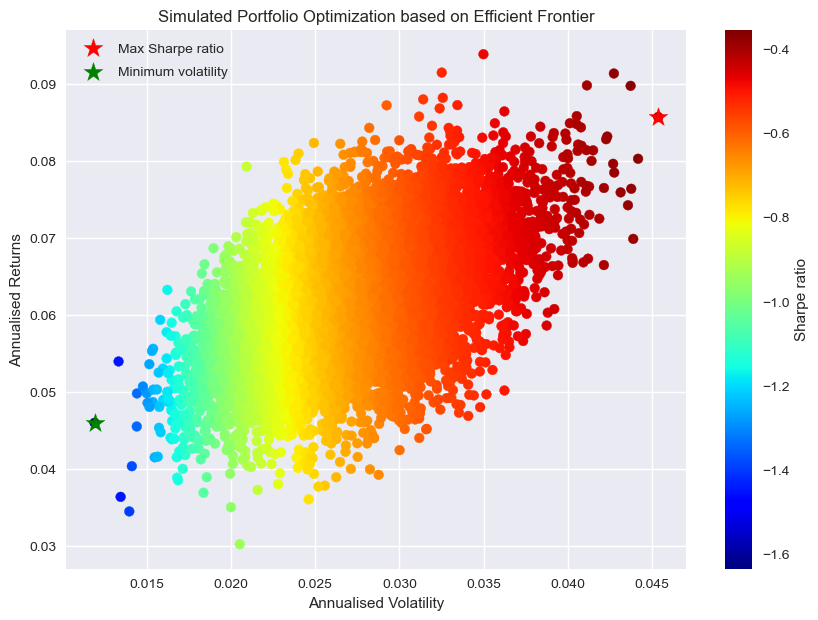

In [39]:
# Calculate returns statistics
mean_returns = eff_frontier_df.mean()
cov_matrix = eff_frontier_df.cov()

# Generate random portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
np.random.seed(200)

for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = results[0, i] - 0.02 / results[1, i]  # Sharpe Ratio (assuming risk-free rate is 0.02)

# Identify optimal portfolios
max_sharpe_idx = np.argmax(results[2])
sdp_max, rp_max = results[1, max_sharpe_idx], results[0, max_sharpe_idx]

min_vol_idx = np.argmin(results[1])
sdp_min, rp_min = results[1, min_vol_idx], results[0, min_vol_idx]

# Efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='jet', marker='o')
plt.colorbar(label='Sharpe ratio')
plt.scatter(sdp_max, rp_max, marker='*', color='r', s=200, label='Max Sharpe ratio')
plt.scatter(sdp_min, rp_min, marker='*', color='g', s=200, label='Minimum volatility')

plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('Annualised Volatility')
plt.ylabel('Annualised Returns')
plt.legend(labelspacing=0.8)
plt.show()